In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
excel_file = pd.read_excel('dataset_clean_jakarta_float_AD.xlsx')

In [3]:
df = pd.DataFrame(excel_file)
print(df)

      Bulan  Tanggal  Waktu     SO2       PM25       PM10         O3  \
0         9       28      0  13.620  36.150000  39.100000  60.690000   
1         9       28      1  13.620  36.540000  39.500000  60.690000   
2         9       28      2  13.600  36.290000  39.210000  60.730000   
3         9       28      3  13.560  36.250000  39.110000  60.750000   
4         9       28      4  13.475  36.751667  39.766667  60.886667   
...     ...      ...    ...     ...        ...        ...        ...   
1627     12        4     19  12.060  42.020000  86.670000  60.020000   
1628     12        4     20  12.560  43.250000  87.580000  60.020000   
1629     12        4     21  13.020  45.270000  90.830000  60.020000   
1630     12        4     22  13.460  47.580000  95.690000  60.020000   
1631     12        4     23  13.770  50.380000  95.690000  60.020000   

            NO2        CO  
0     20.770000  0.600314  
1     20.690000  0.635034  
2     20.650000  0.669754  
3     20.670000  0.7044

In [4]:
df['Laju_SO2'] = None
df['Laju_PM25'] = None
df['Laju_PM10'] = None
df['Laju_O3'] = None
df['Laju_NO2'] = None
df['Laju_CO'] = None

In [5]:
# Membuat nilai untuk nilai pertama dulu
df.loc[0,'Laju_SO2'] = (df.loc[1,'SO2']-df.loc[0,'SO2'])
df.loc[0,'Laju_PM25'] = (df.loc[1,'PM25']-df.loc[0,'PM25'])
df.loc[0,'Laju_PM10'] = (df.loc[1,'PM10']-df.loc[0,'PM10'])
df.loc[0,'Laju_O3'] = (df.loc[1,'O3']-df.loc[0,'O3'])
df.loc[0,'Laju_NO2'] = (df.loc[1,'NO2']-df.loc[0,'NO2'])
df.loc[0,'Laju_CO'] = (df.loc[1,'CO']-df.loc[0,'CO'])

In [6]:
for i in range(1, len(df)-1):
    df.loc[i, 'Laju_SO2'] = ((df.loc[i, 'SO2'] - df.loc[i-1, 'SO2']) + (df.loc[i+1, 'SO2'] - df.loc[i, 'SO2'])) / 2
    df.loc[i, 'Laju_PM25'] = ((df.loc[i, 'PM25'] - df.loc[i-1, 'PM25']) + (df.loc[i+1, 'PM25'] - df.loc[i, 'PM25'])) / 2
    df.loc[i, 'Laju_PM10'] = ((df.loc[i, 'PM10'] - df.loc[i-1, 'PM10']) + (df.loc[i+1, 'PM10'] - df.loc[i, 'PM10'])) / 2
    df.loc[i, 'Laju_O3'] = ((df.loc[i, 'O3'] - df.loc[i-1, 'O3']) + (df.loc[i+1, 'O3'] - df.loc[i, 'O3'])) / 2
    df.loc[i, 'Laju_NO2'] = ((df.loc[i, 'NO2'] - df.loc[i-1, 'NO2']) + (df.loc[i+1, 'NO2'] - df.loc[i, 'NO2'])) / 2
    df.loc[i, 'Laju_CO'] = ((df.loc[i, 'CO'] - df.loc[i-1, 'CO']) + (df.loc[i+1, 'CO'] - df.loc[i, 'CO'])) / 2

In [7]:
# Membuat nilai untuk terakhir
df.loc[len(df)-1,'Laju_SO2'] = (df.loc[len(df)-2,'SO2']-df.loc[len(df)-1,'SO2'])
df.loc[len(df)-1,'Laju_PM25'] = (df.loc[len(df)-2,'PM25']-df.loc[len(df)-1,'PM25'])
df.loc[len(df)-1,'Laju_PM10'] = (df.loc[len(df)-2,'PM10']-df.loc[len(df)-1,'PM10'])
df.loc[len(df)-1,'Laju_O3'] = (df.loc[len(df)-2,'O3']-df.loc[len(df)-1,'O3'])
df.loc[len(df)-1,'Laju_NO2'] = (df.loc[len(df)-2,'NO2']-df.loc[len(df)-1,'NO2'])
df.loc[len(df)-1,'Laju_CO'] = (df.loc[len(df)-2,'CO']-df.loc[len(df)-1,'CO'])

In [8]:
# memisahkan fitur input dan output

input_features = ['SO2','PM25','PM10','O3','NO2','CO']
output_features = ['SO2','PM25','PM10','O3','NO2','CO']

In [9]:
# x mengambil data pada df yang fiturnya ada di input_features
# y mengambil data pada df yang fiturnya ada di output_features
x = df[input_features].values
y = df[output_features].values

In [10]:
print(x)

[[13.62       36.15       39.1        60.69       20.77        0.60031361]
 [13.62       36.54       39.5        60.69       20.69        0.63503395]
 [13.6        36.29       39.21       60.73       20.65        0.66975428]
 ...
 [13.02       45.27       90.83       60.02       23.12        0.38      ]
 [13.46       47.58       95.69       60.02       23.08        0.37      ]
 [13.77       50.38       95.69       60.02       23.02        0.35      ]]


In [11]:
# normalisasi supaya skalanya konsisten 0-1
# inisialisasi dulu
scaler = MinMaxScaler()

# x_scaled dan y_scaled ini adalah hasil tranformasi
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)

In [12]:
print(x_scaled)

[[0.481785   0.46700855 0.27035702 0.07941484 0.06398058 0.26074334]
 [0.481785   0.47367521 0.27541042 0.07941484 0.06372168 0.29691036]
 [0.48079571 0.46940171 0.2717467  0.08359457 0.06359223 0.33307738]
 ...
 [0.45210626 0.62290598 0.92388825 0.00940439 0.07158576 0.03125   ]
 [0.47387067 0.66239316 0.98528709 0.00940439 0.07145631 0.02083333]
 [0.48920469 0.71025641 0.98528709 0.00940439 0.07126214 0.        ]]


In [13]:
print(y_scaled)

[[0.481785   0.46700855 0.27035702 0.07941484 0.06398058 0.26074334]
 [0.481785   0.47367521 0.27541042 0.07941484 0.06372168 0.29691036]
 [0.48079571 0.46940171 0.2717467  0.08359457 0.06359223 0.33307738]
 ...
 [0.45210626 0.62290598 0.92388825 0.00940439 0.07158576 0.03125   ]
 [0.47387067 0.66239316 0.98528709 0.00940439 0.07145631 0.02083333]
 [0.48920469 0.71025641 0.98528709 0.00940439 0.07126214 0.        ]]


In [14]:
# Pemisahan data uji, data latih

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size = 0.2, shuffle=False)
# size disini sebagai berapa banyak data yang akan kita gunakan sebagai data testing
# 0.2 artinya 20% data akan digunakan sebagai data uji dan 80% sebagai data latih
# karena kita menggunakan data time series, maka harus ditambahakan shuffle sbg mencegah terjadinya pengacakan data
# saat kita membagi data menjadi data uji dan data latih, urutannya tidak akan teracak


In [15]:
# timesteps ini adalah panjangnya rentang waktu yang akan digunakan input model LSTM
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

timesteps = 24
# menggunakan data 24 jam sebelumnya menjadi input LSTM

n_features_input = len(input_features)
n_features_output = len(output_features)

In [16]:
# mendefinisikan fungsi
def create_sequences(x, y, time_steps) :
  x_seq, y_seq = [], []

# sebelum mengembalikan nilai para seq, kita akan melakukan iterasi
  for i in range(len(x)-time_steps) : #pengurangan dg timesteps krn data paling terakhir tidak akan bisa di proses
    x_seq.append(x[i : i + time_steps])
    y_seq.append(y[i + time_steps ])

  return np.array(x_seq), np.array(y_seq)

In [17]:
x_train_seq, y_train_seq = create_sequences(x_train, y_train, timesteps)

# test data
x_test_seq, y_test_seq = create_sequences(x_test, y_test, timesteps)

In [18]:
# MODEL LSTM4
model = Sequential()

model.add(LSTM(120, input_shape=(timesteps, n_features_input), return_sequences=True))
model.add(LSTM(120, return_sequences=True))  # Layer LSTM tambahan
model.add(LSTM(120))  # Layer LSTM lainnya
model.add(Dense(n_features_output))

#layer output
model.add(Dense(n_features_output))

In [19]:
model.compile(optimizer='adam', loss='mae') # mae bisa ganti rmse atau mse

In [20]:
#fitting, bangun model
hist = model.fit(x_train_seq, y_train_seq, epochs=100, batch_size=30, validation_data=(x_test_seq, y_test_seq), callbacks=[early_stopping])

Epoch 1/100

43/43 [==============================] - 9s 67ms/step - loss: 0.1516 - val_loss: 0.1516
Epoch 2/100
43/43 [==============================] - 2s 40ms/step - loss: 0.0945 - val_loss: 0.1448
Epoch 3/100
43/43 [==============================] - 2s 39ms/step - loss: 0.0804 - val_loss: 0.1125
Epoch 4/100
43/43 [==============================] - 2s 38ms/step - loss: 0.0683 - val_loss: 0.1000
Epoch 5/100
43/43 [==============================] - 2s 43ms/step - loss: 0.0626 - val_loss: 0.0989
Epoch 6/100
43/43 [==============================] - 2s 49ms/step - loss: 0.0553 - val_loss: 0.0897
Epoch 7/100
43/43 [==============================] - 2s 51ms/step - loss: 0.0470 - val_loss: 0.0762
Epoch 8/100
43/43 [==============================] - 2s 50ms/step - loss: 0.0450 - val_loss: 0.0788
Epoch 9/100
43/43 [==============================] - 2s 51ms/step - loss: 0.0446 - val_loss: 0.0732
Epoch 10/100
43/43 [==============================] - 2s 49ms/step - loss: 0.0371 - val_loss: 0.068

[0.15161527693271637, 0.09453145414590836, 0.08036317676305771, 0.06826464086771011, 0.06260478496551514, 0.05532892420887947, 0.04695744067430496, 0.0449676513671875, 0.04458129405975342, 0.03713711351156235, 0.03684322163462639, 0.03566835820674896, 0.032074276357889175, 0.03067781962454319, 0.029016993939876556, 0.030929753556847572, 0.02629430964589119, 0.026155291125178337, 0.025135254487395287, 0.02499482035636902, 0.022427132353186607, 0.023526333272457123, 0.02253960445523262, 0.022829588502645493, 0.021921180188655853, 0.020111942663788795, 0.019790608435869217, 0.019469277933239937, 0.017826542258262634, 0.01855049468576908, 0.016939032822847366, 0.017484361305832863, 0.0169778261333704, 0.015794046223163605, 0.01696261204779148, 0.015131236054003239, 0.015003321692347527, 0.014890563674271107, 0.015242025256156921, 0.014303809963166714, 0.0158647783100605, 0.01360724214464426, 0.015773408114910126, 0.013954824768006802, 0.013946376740932465, 0.01367118302732706, 0.0136437695

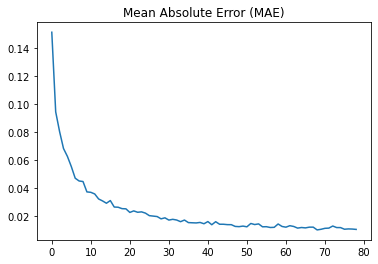

In [21]:
model_history = hist.history
loss = model_history['loss']
print(loss)



plt.figure()
plt.plot(loss, label='MAE')
plt.title('Mean Absolute Error (MAE)')
plt.show()

In [22]:
predictions = model.predict(x_test_seq)

10/10 [==============================] - 1s 14ms/step


In [23]:
# mengembalikan data prediksi ke semula
predictions = scaler.inverse_transform(predictions)

In [24]:
# mengembalikan nilai y_test
y_test_original = scaler.inverse_transform(y_test_seq)

In [25]:
# menghitung MAE prediksi atau mean absolute eror dari testing
mae = np.mean(np.abs(predictions-y_test_original), axis=0)

In [26]:
# iterasi untuk menampilkan MAE masing-masing fitur
for i, feature in enumerate(output_features):
    print("MAE untuk fitur ", feature, " : ", round(mae[i],3))
    if i == 5:
        break

MAE untuk fitur  SO2  :  0.488
MAE untuk fitur  PM25  :  0.886
MAE untuk fitur  PM10  :  1.578
MAE untuk fitur  O3  :  0.233
MAE untuk fitur  NO2  :  4.843
MAE untuk fitur  CO  :  0.022


In [27]:
# menentukan batas, modelnya akurat atau tidak
threshold_mae_SO2 = (df['SO2'].max() - df['SO2'].min()) * 10 / 100
print("threshold_mae_SO2 : ", threshold_mae_SO2)

threshold_mae_PM25 = (df['PM25'].max() - df['PM25'].min()) * 10 / 100
print("threshold_mae_PM25 : ", threshold_mae_PM25)

threshold_mae_PM10 = (df['PM10'].max() - df['PM10'].min()) * 10 / 100
print("threshold_mae_PM10 : ", threshold_mae_PM10)

threshold_mae_O3 = (df['O3'].max() - df['O3'].min()) * 10 / 100
print("threshold_mae_O3 : ", threshold_mae_O3)

threshold_mae_NO2 = (df['NO2'].max() - df['NO2'].min()) * 10 / 100
print("threshold_mae_NO2 : ", threshold_mae_NO2)

threshold_mae_CO = (df['CO'].max() - df['CO'].min()) * 10 / 100
print("threshold_mae_CO : ", threshold_mae_CO)

threshold_mae_SO2 :  2.021648648648649
threshold_mae_PM25 :  5.85
threshold_mae_PM10 :  7.915459459459459
threshold_mae_O3 :  0.9570000000000001
threshold_mae_NO2 :  30.9
threshold_mae_CO :  0.09600000000000002


<function matplotlib.pyplot.show(close=None, block=None)>

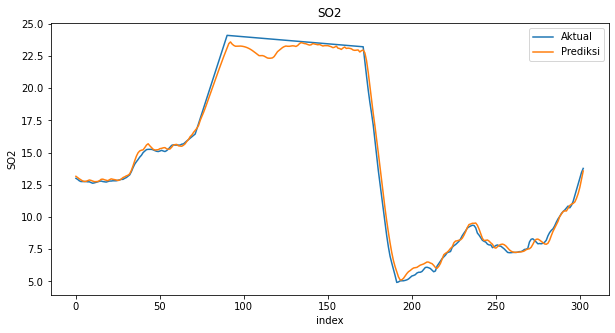

In [45]:
# Plot untuk SO2

target_index = 0 #SO2

plt.figure(figsize=(10,5))
plt.plot(y_test_original[:, target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('index')
plt.ylabel(output_features[target_index])
plt.title('SO2')
plt.legend()
plt.show

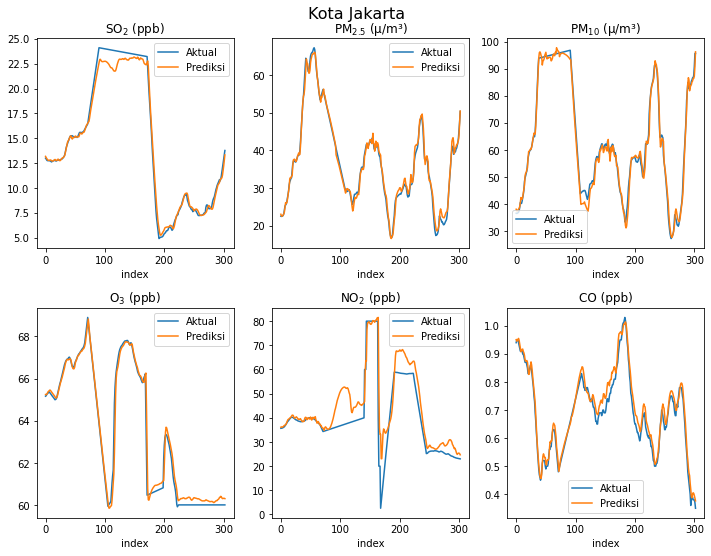

In [31]:
# Create subplots with a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

# Plot each graph in the specified subplot
axs[0, 0].plot(y_test_original[:, 0], label='Aktual')
axs[0, 0].plot(predictions[:, 0], label='Prediksi')
axs[0, 0].set_xlabel('index')
axs[0, 0].set_title('SO$_2$ (ppb)')

axs[0, 1].plot(y_test_original[:, 1], label='Aktual')
axs[0, 1].plot(predictions[:, 1], label='Prediksi')
axs[0, 1].set_xlabel('index')
axs[0, 1].set_title('PM$_{2.5}$ (\u03BC/m\u00B3)')

axs[0, 2].plot(y_test_original[:, 2], label='Aktual')
axs[0, 2].plot(predictions[:, 2], label='Prediksi')
axs[0, 2].set_xlabel('index')
axs[0, 2].set_title('PM$_{10}$ (\u03BC/m\u00B3)')

axs[1, 0].plot(y_test_original[:, 3], label='Aktual')
axs[1, 0].plot(predictions[:, 3], label='Prediksi')
axs[1, 0].set_xlabel('index')
axs[1, 0].set_title('O$_3$ (ppb)')

axs[1, 1].plot(y_test_original[:, 4], label='Aktual')
axs[1, 1].plot(predictions[:, 4], label='Prediksi')
axs[1, 1].set_xlabel('index')
axs[1, 1].set_title('NO$_2$ (ppb)')

axs[1, 2].plot(y_test_original[:, 5], label='Aktual')
axs[1, 2].plot(predictions[:, 5], label='Prediksi')
axs[1, 2].set_xlabel('index')
axs[1, 2].set_title('CO (ppb)')

# Add legends to each subplot
axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 2].legend()
axs[1, 0].legend()
axs[1, 1].legend()
axs[1, 2].legend()

# Add a main title
plt.suptitle('Kota Jakarta', fontsize=16, y=0.96)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('AQI_kota_Jakarta_plot.png')

# Show the combined plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

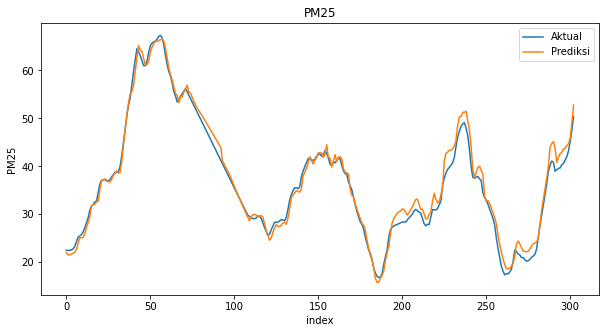

In [46]:
# Plot untuk PM25

target_index = 1 #PM25

plt.figure(figsize=(10,5))
plt.plot(y_test_original[:, target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('index')
plt.ylabel(output_features[target_index])
plt.title('PM25')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

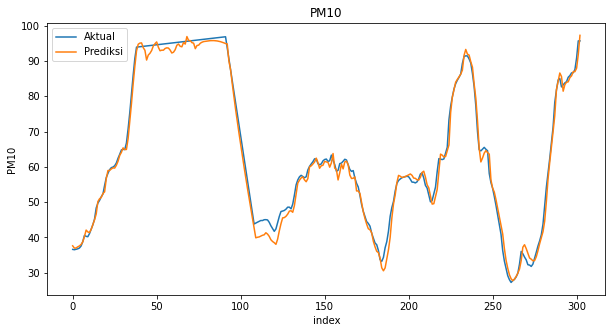

In [47]:
# Plot untuk PM10

target_index = 2 #PM10

plt.figure(figsize=(10,5))
plt.plot(y_test_original[:, target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('index')
plt.ylabel(output_features[target_index])
plt.title('PM10')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

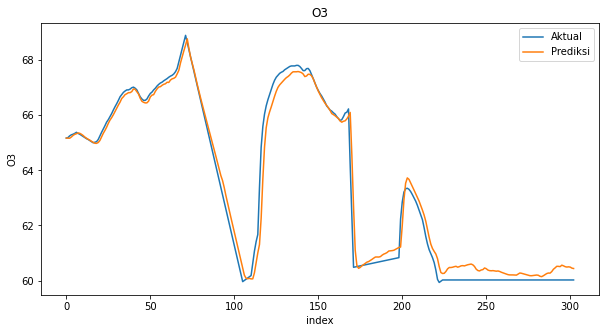

In [48]:
# Plot untuk 

target_index = 3 #O3

plt.figure(figsize=(10,5))
plt.plot(y_test_original[:, target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('index')
plt.ylabel(output_features[target_index])
plt.title('O3')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

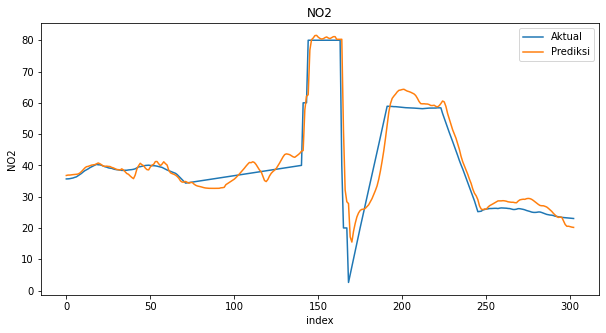

In [49]:
# Plot untuk NO2

target_index = 4 #NO2

plt.figure(figsize=(10,5))
plt.plot(y_test_original[:, target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('index')
plt.ylabel(output_features[target_index])
plt.title('NO2')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

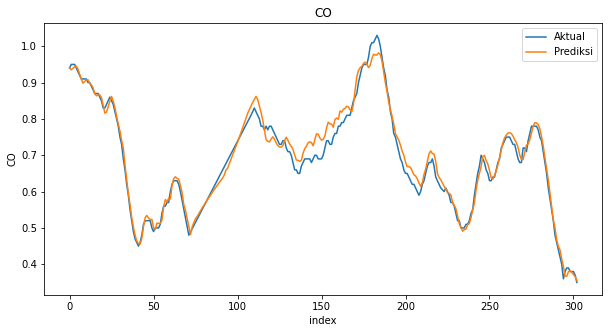

In [50]:
# Plot untuk CO

target_index = 5 #CO

plt.figure(figsize=(10,5))
plt.plot(y_test_original[:, target_index], label='Aktual')
plt.plot(predictions[:,target_index], label='Prediksi')
plt.xlabel('index')
plt.ylabel(output_features[target_index])
plt.title('CO')
plt.legend()
plt.show

In [51]:
# Ambil 24 waktu terakhir dari data Anda
last_24_timesteps = df[input_features].values[-timesteps:]

# Normalisasi menggunakan scaler
last_24_timesteps_scaled = scaler.transform(last_24_timesteps)

# Inisialisasi array untuk menyimpan hasil prediksi
future_predictions = []

# Lakukan prediksi untuk 24 waktu ke depan
for _ in range(72):
    # Reshape untuk sesuai dengan input model
    input_sequence = last_24_timesteps_scaled.reshape(1, timesteps, n_features_input)
    
    # Prediksi satu waktu ke depan
    prediction = model.predict(input_sequence)
    
    # Invers transformasi scaler untuk mendapatkan nilai dalam skala asli
    prediction_inversed = scaler.inverse_transform(prediction)
    
    # Tambahkan prediksi ke dalam array hasil
    future_predictions.append(prediction_inversed.flatten())
    
    # Update sekuens input untuk waktu berikutnya
    last_24_timesteps_scaled = np.concatenate((last_24_timesteps_scaled[1:], prediction), axis=0)

# Konversi hasil prediksi ke dalam DataFrame
future_predictions_df = pd.DataFrame(future_predictions, columns=output_features)

# Tampilkan hasil prediksi
print(future_predictions_df)

1/1 [==============================] - 0s 39ms/step
          SO2       PM25       PM10         O3        NO2        CO
0   13.888899  53.125805  96.750305  60.526768  19.706715  0.348623
1   14.125929  55.532516  97.995232  60.917118  17.398348  0.339931
2   14.348075  58.018970  98.656067  61.370094  15.749522  0.333535
3   14.585656  60.352978  98.614639  61.858829  14.583354  0.330899
4   14.839563  62.351997  97.892632  62.374863  13.926162  0.332493
..        ...        ...        ...        ...        ...       ...
67  17.310997  67.166504  89.362503  65.081718  13.409893  0.412885
68  17.090637  65.648384  85.019661  65.282738  17.667273  0.444685
69  16.917446  64.849701  82.250664  65.460960  22.107277  0.478499
70  16.768206  64.355698  80.422653  65.618233  26.463692  0.513815
71  16.623898  63.840878  79.014938  65.758232  30.652981  0.550462

[72 rows x 6 columns]


In [52]:
P_SO2 = []
P_PM25 = []
P_PM10 = []
P_O3 = []
P_NO2 = []
P_CO = []

for i in future_predictions_df['SO2']:
    P_SO2.append(np.abs(i))
for i in future_predictions_df['PM25']:
    P_PM25.append(np.abs(i))
for i in future_predictions_df['PM10']:
    P_PM10.append(np.abs(i))
for i in future_predictions_df['O3']:
    P_O3.append(np.abs(i))
for i in future_predictions_df['NO2']:
    P_NO2.append(np.abs(i))
for i in future_predictions_df['CO']:
    P_CO.append(np.abs(i))

In [53]:
def Perhitungan_Median(SO2, PM25, PM10, O3, NO2, CO):
    # Median hari ke satu setiap variabel
    m_SO2_1 = np.median(SO2[0:23])
    m_PM25_1 = np.median(PM25[0:23])
    m_PM10_1 = np.median(PM10[0:23])
    m_O3_1 = np.median(O3[0:23])
    m_NO2_1 = np.median(NO2[0:23])
    m_CO_1 = np.median(CO[0:23])

    # Median hari ke dua setiap variabel
    m_SO2_2 = np.median(SO2[24:47])
    m_PM25_2 = np.median(PM25[24:47])
    m_PM10_2 = np.median(PM10[24:47])
    m_O3_2 = np.median(O3[24:47])
    m_NO2_2 = np.median(NO2[24:47])
    m_CO_2 = np.median(CO[24:47])

    # Median hari ke tiga setiap variabel
    m_SO2_3 = np.median(SO2[48:71])
    m_PM25_3 = np.median(PM25[48:71])
    m_PM10_3 = np.median(PM10[48:71])
    m_O3_3 = np.median(O3[48:71])
    m_NO2_3 = np.median(NO2[48:71])
    m_CO_3 = np.median(CO[48:71])

    return m_SO2_1, m_PM25_1, m_PM10_1, m_O3_1, m_NO2_1, m_CO_1, m_SO2_2, m_PM25_2, m_PM10_2, m_O3_2, m_NO2_2, m_CO_2, m_SO2_3, m_PM25_3, m_PM10_3, m_O3_3, m_NO2_3, m_CO_3

# Memanggil fungsi
m_SO2_1, m_PM25_1, m_PM10_1, m_O3_1, m_NO2_1, m_CO_1, m_SO2_2, m_PM25_2, m_PM10_2, m_O3_2, m_NO2_2, m_CO_2, m_SO2_3, m_PM25_3, m_PM10_3, m_O3_3, m_NO2_3, m_CO_3 = Perhitungan_Median(P_SO2, P_PM25, P_PM10, P_O3, P_NO2, P_CO)


In [54]:
def hitung_AQI_SO2(median_value):
    if 0.0 <= median_value < 35.0:
        return ((50.0 - 0.0) / (35.0 - 0.0)) * (median_value - 0.0) + 0.0
    elif 35.0 <= median_value < 75.0:
        return ((100.0 - 50.0) / (75.0 - 35.0)) * (median_value - 35.0) + 50.0
    elif 75.0 <= median_value < 185.0:
        return ((150.0 - 100.0) / (185.0 - 75.0)) * (median_value - 75.0) + 100.0
    elif 185.0 <= median_value < 304.0:
        return ((200.0 - 150.0) / (304.0 - 185.0)) * (median_value - 185.0) + 150.0
    elif 304.0 <= median_value < 604.0:
        return ((300.0 - 200.0) / (604.0 - 304.0)) * (median_value - 304.0) + 200.0
    elif 604.0 <= median_value < 804.0:
        return ((400.0 - 300.0) / (804.0 - 604.0)) * (median_value - 604.0) + 300.0
    else:
        return ((500.0 - 400.0) / (1004.0 - 805.0)) * (median_value - 805.0) + 400.0

def hitung_AQI_PM25(median_value):
    if 0.0 <= median_value < 12.0:
        return ((50.0 - 0.0) / (12.0 - 0.0)) * (median_value - 0.0) + 0.0
    elif 12.0 <= median_value < 35.4:
        return ((100.0 - 50.0) / (35.4 - 12.00)) * (median_value - 12.00) + 50.0
    elif 35.4 <= median_value < 55.4:
        return ((150.0 - 100.0) / (55.4 - 35.4)) * (median_value - 35.4) + 100.0
    elif 55.4 <= median_value < 150.4:
        return ((200.0 - 150.0) / (150.4 - 55.4)) * (median_value - 55.4) + 150.0
    elif 150.4 <= median_value < 250.4:
        return ((300.0 - 200.0) / (250.4 - 150.4)) * (median_value - 150.4) + 200.0
    elif 250.5 <= median_value < 350.4:
        return ((400.0 - 300.0) / (350.4 - 250.4)) * (median_value - 250.4) + 300.0
    else:
        return ((500.0 - 400.0) / (500.4 - 305.4)) * (median_value - 305.0) + 400.0

def hitung_AQI_PM10(median_value):
    if 0.0 <= median_value < 54.0:
        return ((50.0 - 0.0) / (54.0 - 0.0)) * (median_value - 0.0) + 0.0
    elif 54.0 <= median_value < 154.0:
        return ((100.0 - 50.0) / (154.0 - 54.00)) * (median_value - 54.00) + 50.0
    elif 154.0 <= median_value < 254.0:
        return ((150.0 - 100.0) / (254.0 - 154.0)) * (median_value - 154.0) + 100.0
    elif 254.0 <= median_value < 354.0:
        return ((200.0 - 150.0) / (354.0 - 254.0)) * (median_value - 254.0) + 150.0
    elif 354.0 <= median_value < 424.0:
        return ((300.0 - 200.0) / (424.0 - 354.0)) * (median_value - 354.0) + 200.0
    elif 424.0 <= median_value < 504.0:
        return ((400.0 - 300.0) / (504.0 - 424.0)) * (median_value - 424.0) + 300.0
    else:
        return ((500.0 - 400.0) / (604.0 - 504.0)) * (median_value - 504.0) + 400.00

def hitung_AQI_O3(median_value):
    if 0.0 <= median_value < 54.0:
        return ((50.0 - 0.0) / (54.0 - 0.0)) * (median_value - 0.0) + 0.0
    elif 54.0 <= median_value < 70.0:
        return ((100.0 - 50.0) / (70.0 - 54.00)) * (median_value - 54.00) + 50.0
    elif 70.0 <= median_value < 85.0:
        return ((150.0 - 100.0) / (85.0 - 70.0)) * (median_value - 70.0) + 100.0
    elif 85.0 <= median_value < 105.0:
        return ((200.0 - 150.0) / (105.0 - 85.0)) * (median_value - 85.0) + 150.0
    elif 105.0 <= median_value < 200.0:
        return ((300.0 - 200.0) / (200.0 - 105.0)) * (median_value - 105.0) + 200.0
    elif 200.0 <= median_value < 504.0:
        return ((400.0 - 300.0) / (504.0 - 200.0)) * (median_value - 200.0) + 300.0
    else:
        return ((500.0 - 400.0) / (604.0 - 504.0)) * (median_value - 504.0) + 400.0
    
def hitung_AQI_NO2(median_value):
    if 0.0 <= median_value < 54.0:
        return ((50.0 - 0.0) / (54.0 - 0.0)) * (median_value - 0.0) + 0.0
    elif 54.0 <= median_value < 100.0:
        return ((100.0 - 50.0) / (100.0 - 54.00)) * (median_value - 54.00) + 50.0
    elif 100.0 <= median_value < 360.0:
        return ((150.0 - 100.0) / (360.0 - 100.0)) * (median_value - 100.0) + 100.0
    elif 360.0 <= median_value < 649.0:
        return ((200.0 - 150.0) / (649.0 - 360.0)) * (median_value - 360.0) + 150.0
    elif 649.0 <= median_value < 1249.0:
        return ((300.0 - 200.0) / (1249.0 - 649.0)) * (median_value - 649.0) + 200.0
    elif 1249.0 <= median_value < 1649.0:
        return ((400.0 - 300.0) / (1649.0 - 1249.0)) * (median_value - 1249.0) + 300.0
    else:
        return ((500.0 - 400.0) / (2049.0 - 1649.0)) * (median_value - 1649.0) + 400.00

def hitung_AQI_CO(median_value):
    if 0.0 <= median_value < 4.4:
        return ((50.0 - 0.0) / (4.4 - 0.0)) * (median_value - 0.0) + 0.0
    elif 4.4 <= median_value < 9.4:
        return ((100.0 - 50.0) / (9.4 - 4.40)) * (median_value - 4.40) + 50.0
    elif 9.4 <= median_value < 12.4:
        return ((150.0 - 100.0) / (12.4 - 9.4)) * (median_value - 9.4) + 100.0
    elif 12.4 <= median_value < 15.4:
        return ((200.0 - 150.0) / (15.4 - 12.4)) * (median_value - 12.4) + 150.0
    elif 15.4 <= median_value < 30.4:
        return ((300.0 - 200.0) / (30.4 - 15.4)) * (median_value - 15.4) + 200.0
    elif 30.4 <= median_value < 40.4:
        return ((400.0 - 300.0) / (40.4 - 30.4)) * (median_value - 30.4) + 300.0
    else:
        return ((500.0 - 400.0) / (50.4 - 40.4)) * (median_value - 40.4) + 400.0

def Perhitungan_AQI(m_SO2_1, m_PM25_1, m_PM10_1, m_O3_1, m_NO2_1, m_CO_1, m_SO2_2, m_PM25_2, m_PM10_2, m_O3_2, m_NO2_2, m_CO_2, m_SO2_3, m_PM25_3, m_PM10_3, m_O3_3, m_NO2_3, m_CO_3):
    AQI_SO2_1 = hitung_AQI_SO2(m_SO2_1)
    AQI_SO2_2 = hitung_AQI_SO2(m_SO2_2)
    AQI_SO2_3 = hitung_AQI_SO2(m_SO2_3)
    AQI_PM25_1 = hitung_AQI_PM25(m_PM25_1)
    AQI_PM25_2 = hitung_AQI_PM25(m_PM25_2)
    AQI_PM25_3 = hitung_AQI_PM25(m_PM25_3)
    AQI_PM10_1 = hitung_AQI_PM10(m_PM10_1)
    AQI_PM10_2 = hitung_AQI_PM10(m_PM10_2)
    AQI_PM10_3 = hitung_AQI_PM10(m_PM10_3)
    AQI_O3_1 = hitung_AQI_O3(m_O3_1)
    AQI_O3_2 = hitung_AQI_O3(m_O3_2)
    AQI_O3_3 = hitung_AQI_O3(m_O3_3)
    AQI_NO2_1 = hitung_AQI_NO2(m_NO2_1)
    AQI_NO2_2 = hitung_AQI_NO2(m_NO2_2)
    AQI_NO2_3 = hitung_AQI_NO2(m_NO2_3)
    AQI_CO_1 = hitung_AQI_CO(m_CO_1)
    AQI_CO_2 = hitung_AQI_CO(m_CO_2)
    AQI_CO_3 = hitung_AQI_CO(m_CO_3)
    
    return AQI_SO2_1, AQI_SO2_2, AQI_SO2_3, AQI_PM25_1, AQI_PM25_2, AQI_PM25_3, AQI_PM10_1, AQI_PM10_2, AQI_PM10_3, AQI_O3_1, AQI_O3_2, AQI_O3_3, AQI_NO2_1, AQI_NO2_2, AQI_NO2_3, AQI_CO_1, AQI_CO_2, AQI_CO_3


In [55]:
AQI_SO2_1, AQI_SO2_2, AQI_SO2_3, AQI_PM25_1, AQI_PM25_2, AQI_PM25_3, AQI_PM10_1, AQI_PM10_2, AQI_PM10_3, AQI_O3_1, AQI_O3_2, AQI_O3_3, AQI_NO2_1, AQI_NO2_2, AQI_NO2_3, AQI_CO_1, AQI_CO_2, AQI_CO_3 = Perhitungan_AQI(m_SO2_1, m_PM25_1, m_PM10_1, m_O3_1, m_NO2_1, m_CO_1, m_SO2_2, m_PM25_2, m_PM10_2, m_O3_2, m_NO2_2, m_CO_2, m_SO2_3, m_PM25_3, m_PM10_3, m_O3_3, m_NO2_3, m_CO_3)

In [56]:
print(round(AQI_SO2_1))
print(round(AQI_SO2_2))
print(round(AQI_SO2_3))
print(round(AQI_PM25_1))
print(round(AQI_PM25_2))
print(round(AQI_PM25_3))
print(round(AQI_PM10_1))
print(round(AQI_PM10_2))
print(round(AQI_PM10_3))
print(round(AQI_O3_1))
print(round(AQI_O3_2))
print(round(AQI_O3_3))
print(round(AQI_NO2_1))
print(round(AQI_NO2_2))
print(round(AQI_NO2_3))
print(round(AQI_CO_1))
print(round(AQI_CO_2))
print(round(AQI_CO_3))

22
17
24
155
57
155
65
35
68
86
88
86
26
58
30
5
14
6


In [57]:
for i in df['O3']:
    print(i)

60.69
60.69
60.73
60.75
60.88666666666667
61.02333333333333
61.16
61.29666666666667
61.43333333333334
61.57
60.0
60.00275510204082
60.00551020408163
60.00826530612245
60.01102040816327
60.01377551020408
60.0165306122449
60.01928571428572
60.02204081632653
60.02479591836735
60.02755102040816
60.03030612244898
60.0330612244898
60.03581632653061
60.03857142857143
60.04132653061225
60.04408163265306
60.04683673469388
60.04959183673469
60.05234693877551
60.05510204081633
60.05785714285715
60.06061224489796
60.06336734693878
60.06612244897959
60.06887755102041
60.07163265306122
60.07438775510204
60.07714285714286
60.07989795918368
60.08265306122449
60.08540816326531
60.08816326530612
60.09091836734694
60.09367346938776
60.09642857142858
60.09918367346939
60.10193877551021
60.10469387755102
60.10744897959184
60.11020408163265
60.11295918367347
60.11571428571429
60.11846938775511
60.12122448979592
60.12397959183674
60.12673469387755
60.12948979591837
60.13224489795918
60.13500000000001
60.1377

In [58]:
print(hitung_AQI_PM10(31))

28.703703703703702


In [59]:
model.save("model_jakarta.h5")

C:\Users\halim\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
